<a href="https://colab.research.google.com/github/Daiane-Macedo/Data_Science_PUC/blob/master/Trab_ES_para_CD_Daiane.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Engenharia de Software para Ciência de Dados - PUC-Rio
**Aluna**: Daiane Santos de Macedo

**GitHub**: https://github.com/Daiane-Macedo/Data_Science_PUC/

In [1]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Importação de pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from prettytable import PrettyTable
from google.colab import drive
from imblearn.over_sampling import RandomOverSampler
from collections import Counter


from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

# Descrição do problema e Requisitos
### User story
**Como** dretora de duas escolas, **quero** prever se os alunos serão aprovados em Matemática no final do ano letivo (nota final igual ou maior que 10).
O objetivo é identificar alunos com altas probabilidades de reprovação **para** prestar um auxilio prévio a esses estudantes. Além de, durante as análises, idenficar fatores sociais que possam influenciar no rendimento acadêmico do aluno.



# Introdução ao dataset

Os dados abordam o desempenho de alunos no ensino secundário de duas escolas portuguesas. Os atributos dos dados incluem notas dos alunos, características demográficas, sociais e relacionadas à escola, e foram coletados por meio de relatórios e questionários escolares. São fornecidos dois conjuntos de dados relativos ao desempenho em duas disciplinas distintas: Matemática (mat) e Língua Portuguesa (por), porém nessa análise serão considerados apenas os dados de matemática.
Obs: o atributo alvo G3 tem uma forte correlação com os atributos G2 e G1. Isso ocorre porque G3 é a nota final do ano (emitido no 3º período), enquanto G1 e G2 correspondem às notas do 1º e 2º período. É mais difícil prever G3 sem G2 e G1, mas essa previsão é muito mais útil. 

### 2.1. Descrição dos atributos


In [2]:
# Informa o cabeçalho das colunas
atributos = ['school', 'sex', 'age', 'address', 'fam_size', 'parents_status', 'mother_edu', 'father_edu', 'mother_job', 'father_job', 'reason',
             'guardian', 'travel_time', 'study_time', 'failures', 'school_sup', 'family_sup', 'paid', 'activities', 'nursery', 'higher', 'internet',
             'romantic', 'family_rel', 'free_time', 'go_out', 'd_alcool', 'w_alcool', 'health', 'absences', 'G1', 'G2', 'G3']

table = PrettyTable()
#formata tabela com linha horizontal
table.hrules = 1

table.field_names = ('Atributtes', 'Type', 'Definition', 'Values')
table.add_rows([
                [atributos[0], "Binary","Student's school", " GP - Gabriel Pereira or MS - Mousinho da Silveira"],
                [atributos[1], "Binary", "Student's sex", " F - female or M - male"],
                [atributos[2], "Numeric", "Student's age", "from 15 to 22"],
                [atributos[3], "Binary", "Student's home address type", "U - urban or R - rural"],
                [atributos[4], "Binary", "Family size", "'LE3' - less or equal to 3 or 'GT3' - greater than 3"],
                [atributos[5], "Binary", "Parent's cohabitation status", "'T' - living together or 'A' - apart"],
                [atributos[6], "Numeric", "Mother's education", "0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education"],
                [atributos[7], "Numeric", "Father's education", "0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education"],
                [atributos[8], "Nominal", "Mother's job", "'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other'"],
                [atributos[9], "Nominal", "Father's job", "'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other'"],
                [atributos[10], "Nominal", "Reason to choose this school", "Close to 'home', school 'reputation', 'course' preference or 'other'"],
                [atributos[11], "Nominal", "Student's guardian", "'mother', 'father' or 'other'"],
                [atributos[12], "Numeric", "Home to school travel time", "1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour"],
                [atributos[13], "Numeric", "Weekly study time", "1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours"],
                [atributos[14], "Numeric", "Number of past class failures", "n if 1<=n<3, else 4)"],
                [atributos[15], "Binary", "Extra educational support", "Yes or no"],
                [atributos[16], "Binary", "Family educational support", "Yes or no"],
                [atributos[17], "Binary", "Extra paid classes within the course subject", "Yes or no"],
                [atributos[18], "Binary", "Extra cuurricular activities", "Yes or no"],
                [atributos[19], "Binary", "Attended nursery school", "Yes or no"],
                [atributos[20], "Binary", "Wants to take higher education", "Yes or no"],
                [atributos[21], "Binary", "Internet access at home", "ess or no"],
                [atributos[22], "Binary", "With a romantic relationship", "Yes or no"],
                [atributos[23], "Numeric", "Quality of family relationships", "From 1 - very bad to 5 - excellent"],
                [atributos[24], "Numeric", "Free time after school", "From 1 - very bad to 5 - very high"],
                [atributos[25], "Numeric", "Going out with friends", "From 1 - very bad to 5 - very high"],
                [atributos[26], "Numeric", "Workday alcohol consumption", "From 1 - very bad to 5 - very high"],
                [atributos[27], "Numeric", "Weekend alcohol consumption", "From 1 - very bad to 5 - very high"],
                [atributos[28], "Numeric", "Current health status", "From 1 - very bad to 5 - very good"],
                [atributos[29], "Numeric", "Number of school absences", "From 0 to 93"]
                
              ])

print(table)

+----------------+---------+----------------------------------------------+--------------------------------------------------------------------------------------------------------------------+
|   Atributtes   |   Type  |                  Definition                  |                                                       Values                                                       |
+----------------+---------+----------------------------------------------+--------------------------------------------------------------------------------------------------------------------+
|     school     |  Binary |               Student's school               |                                  GP - Gabriel Pereira or MS - Mousinho da Silveira                                 |
+----------------+---------+----------------------------------------------+--------------------------------------------------------------------------------------------------------------------+
|      sex       |  Binary |       

In [3]:
data = pd.read_csv('sample_data/student-mat.csv', names=atributos, skiprows=1, delimiter=';')


# Análise Exploratória de dados

## 3.1. Informações Gerais

In [4]:
# verificando os tipos de cada coluna
data.dtypes

school            object
sex               object
age                int64
address           object
fam_size          object
parents_status    object
mother_edu         int64
father_edu         int64
mother_job        object
father_job        object
reason            object
guardian          object
travel_time        int64
study_time         int64
failures           int64
school_sup        object
family_sup        object
paid              object
activities        object
nursery           object
higher            object
internet          object
romantic          object
family_rel         int64
free_time          int64
go_out             int64
d_alcool           int64
w_alcool           int64
health             int64
absences           int64
G1                 int64
G2                 int64
G3                 int64
dtype: object

In [5]:
# config para mostrar todas as colunas
pd.set_option('display.max_columns', None)
# exibindo as primeiras 3 linhas
data.head(3)

,school,sex,age,address,fam_size,parents_status,mother_edu,father_edu,mother_job,father_job,reason,guardian,travel_time,study_time,failures,school_sup,family_sup,paid,activities,nursery,higher,internet,romantic,family_rel,free_time,go_out,d_alcool,w_alcool,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10


Ao total, o dataset possui 395 instância com 33 variáveis (numéricas e categoricas)

In [6]:
# exibindo as dimensões do dataset (linhas, colunas)
data.shape

(395, 33)

In [7]:
# exibindo a quantidade de linhas por coluna
data.count()

school            395
sex               395
age               395
address           395
fam_size          395
parents_status    395
mother_edu        395
father_edu        395
mother_job        395
father_job        395
reason            395
guardian          395
travel_time       395
study_time        395
failures          395
school_sup        395
family_sup        395
paid              395
activities        395
nursery           395
higher            395
internet          395
romantic          395
family_rel        395
free_time         395
go_out            395
d_alcool          395
w_alcool          395
health            395
absences          395
G1                395
G2                395
G3                395
dtype: int64

In [8]:
#Verificando valores nulos
data.isnull().sum()

school            0
sex               0
age               0
address           0
fam_size          0
parents_status    0
mother_edu        0
father_edu        0
mother_job        0
father_job        0
reason            0
guardian          0
travel_time       0
study_time        0
failures          0
school_sup        0
family_sup        0
paid              0
activities        0
nursery           0
higher            0
internet          0
romantic          0
family_rel        0
free_time         0
go_out            0
d_alcool          0
w_alcool          0
health            0
absences          0
G1                0
G2                0
G3                0
dtype: int64

#### Distribuição das classes
A distribuição das classes é desequilibrada, pois o número de alunos com nota acima da média é mais que o dobro do número de alunos abaixo da média. Possivelmente precisaremos realizar algum tipo de tratamento para balanceamento nas próximas etapas.

In [9]:
# distribuição inicial das classes
#criando coluna com resultado da avaliacao final (G3>=10 - aprovado, G3<10 - reprovado)
data['class'] = np.where(data['G3']>= 10, 'pass', 'fail')
data['class'].groupby(data['class']).count()

class
fail    130
pass    265
Name: class, dtype: int64

## 3.2. Estatística Descritiva
Quando analisamos o atributo absenses (ausências) vemos um valor máximo muito distante da média, o que indica a presença de outliers.

In [10]:
# exibindo um sumário estatístico (quantidade, média, desvio padrão, mínimo, quartis e máximo)
data.describe()

,age,mother_edu,father_edu,travel_time,study_time,failures,family_rel,free_time,go_out,d_alcool,w_alcool,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


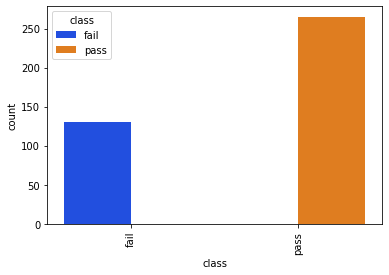

In [11]:
p = sns.countplot(x="class", data = data, hue='class', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 

### Correlação
A correlação representa como duas variáveis numéricas estão relacionadas. Existem várias formas de calcular a correlação entre duas variáveis, como por exemplo, o coeficiente de correlação de Pearson, que pode ser:

* Próximo de -1: há uma correlação negativa entre as variáveis;
* Próximo de +1: há uma correlação positiva entre as variáveis;
* 0: Não há correlação entre as variáveis.


A alta correlacão entre G1, G2 e G3 já era esperada, conforme sinalizado no início do trabalho, pois geralmente a nota final é calculada considerando as notas anteriores. Com exceção dessas variáveis, nenhuma outra correlção chama atenção

In [12]:
# Correlação de Pearson
data.corr(method = 'pearson')

,age,mother_edu,father_edu,travel_time,study_time,failures,family_rel,free_time,go_out,d_alcool,w_alcool,health,absences,G1,G2,G3
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
mother_edu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
father_edu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
travel_time,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
study_time,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
family_rel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363
free_time,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307
go_out,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791
d_alcool,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660


### Simetria

Se o coeficiente resultante for:

  * Maior que 0: a distribuição é assimétrica positiva (maior à esquerda e menor à direita);

  * Menor que 0: a distribuição é assimétrica negativa (maior à direita e menor à esquerda);

  * Igual a 0: a distribuição é simétrica.


In [13]:
# Simetria de cada atributo
data.skew()

age            0.466270
mother_edu    -0.318381
father_edu    -0.031672
travel_time    1.607029
study_time     0.632142
failures       2.387026
family_rel    -0.951882
free_time     -0.163351
go_out         0.116502
d_alcool       2.190762
w_alcool       0.611960
health        -0.494604
absences       3.671579
G1             0.240613
G2            -0.431645
G3            -0.732672
dtype: float64

## 3.3. Visualizações Unimodais

### Histograma
Com o histograma temos uma melhor visualização para a simetria, mostrada acima.
Ao analisarmos, vemos que a maioria dos atributos possui uma distribuição assimétrica. Isso indica que podemos ter que realizar algum tipo de tratamento para os algoritmos que presupõem uma distribuição normal dos dados 

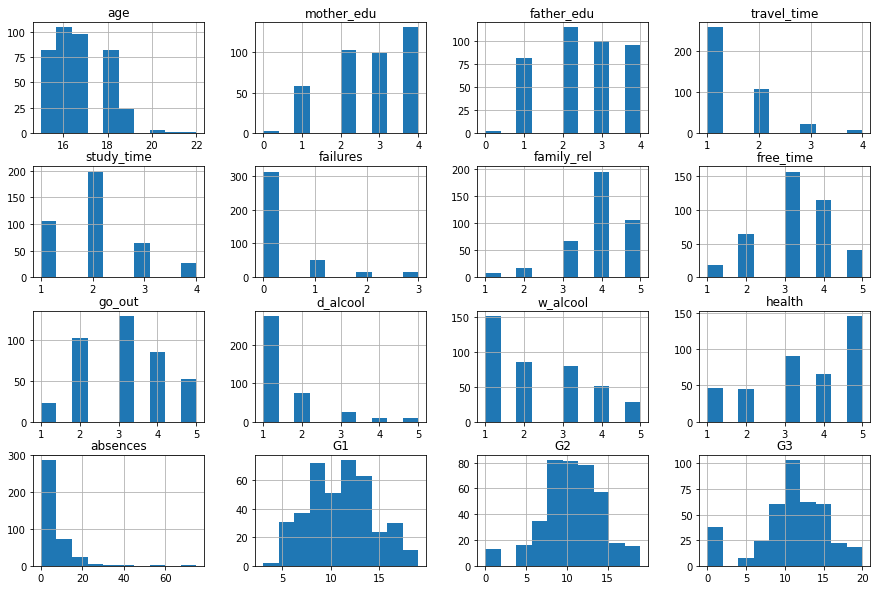

In [14]:
# Histograma
data.hist(figsize = (15,10))
plt.show()

### Density Plot
Uma outra visão para a distribuição dos dados

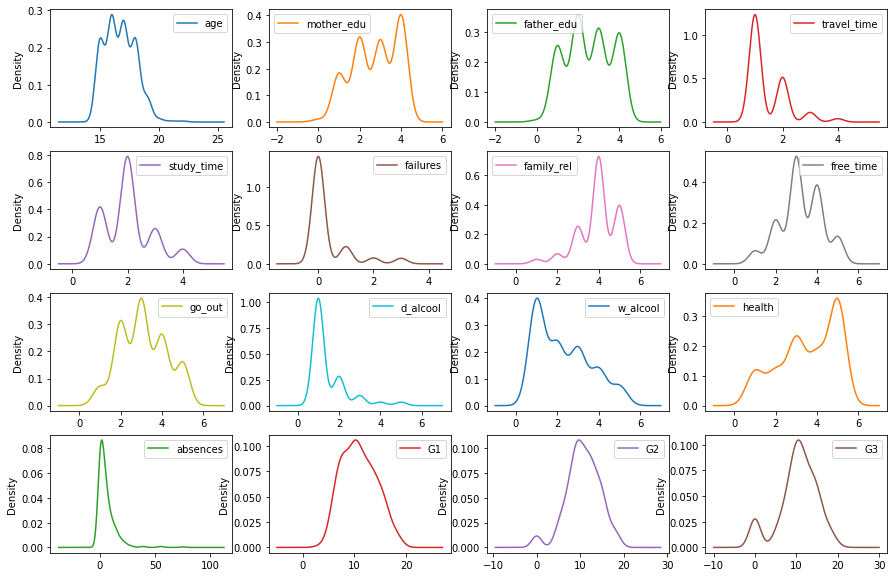

In [15]:
# Density Plot
data.plot(kind = 'density', subplots = True, layout = (4,4), sharex = False, figsize = (15,10))
plt.show()

### Boxplot 

A linha no centro (vermelha) representa o valor da mediana (segundo quartil ou p50). A linha abaixo é o 1o quartil (p25) e a linha acima o terceiro quartil (p75). O boxplot ajuda a ter uma ideia da dispersão dos dataset e os possíveis outliers.

*OBS: Se um ponto do dataset é muito distante da média (acima de 3 desvios padrão da média), pode ser considerado outlier.*

Analisando, confirmamos os outliers observados na etapa de estatística descritiva no atributo "absences"

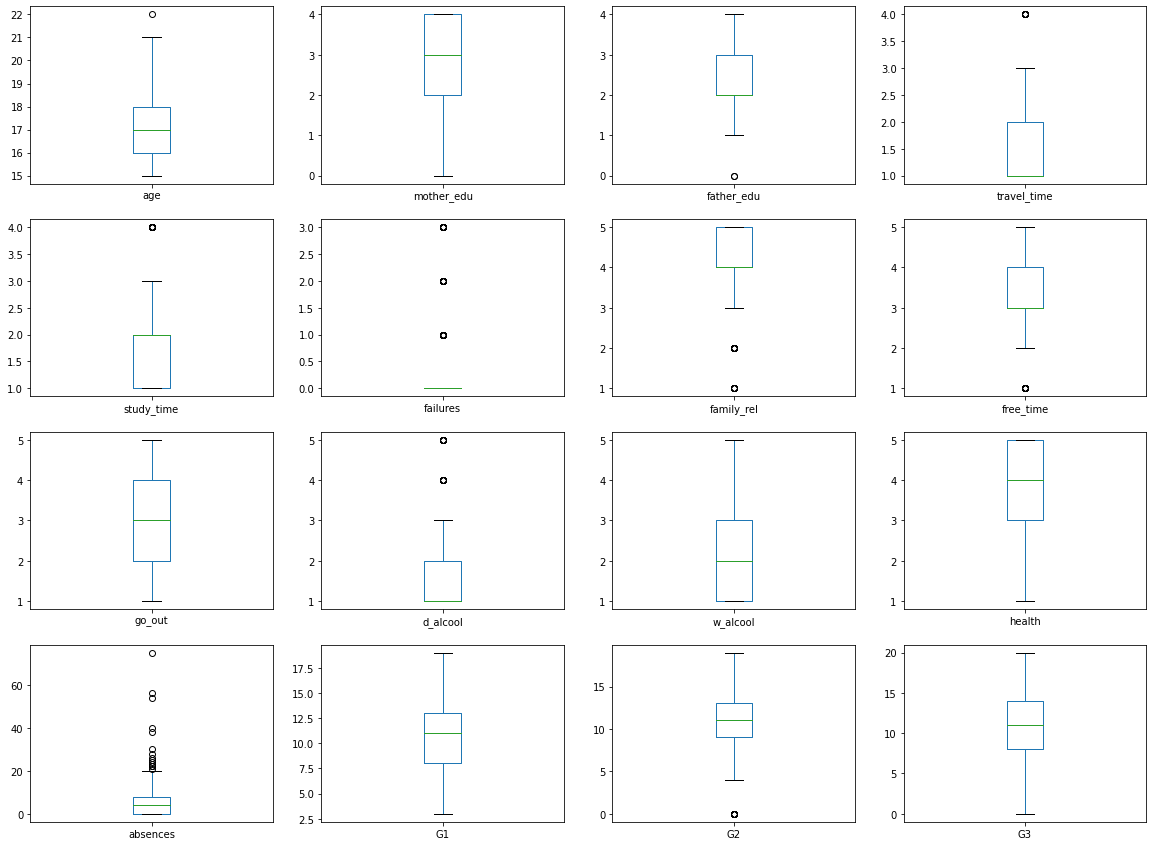

In [16]:
# Boxplot
data.plot(kind = 'box', subplots = True, layout = (4,4), sharex = False, sharey = False, figsize = (20,15))
plt.show()

## 3.4. Visualizações Multimodais

### Matriz de correlação
Uma visualização gráfica para a correlação já observada anteriormente

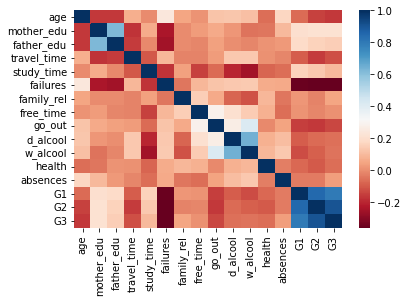

In [17]:
sns.heatmap(data.corr(), annot=False, cmap='RdBu');

### Scatter plot


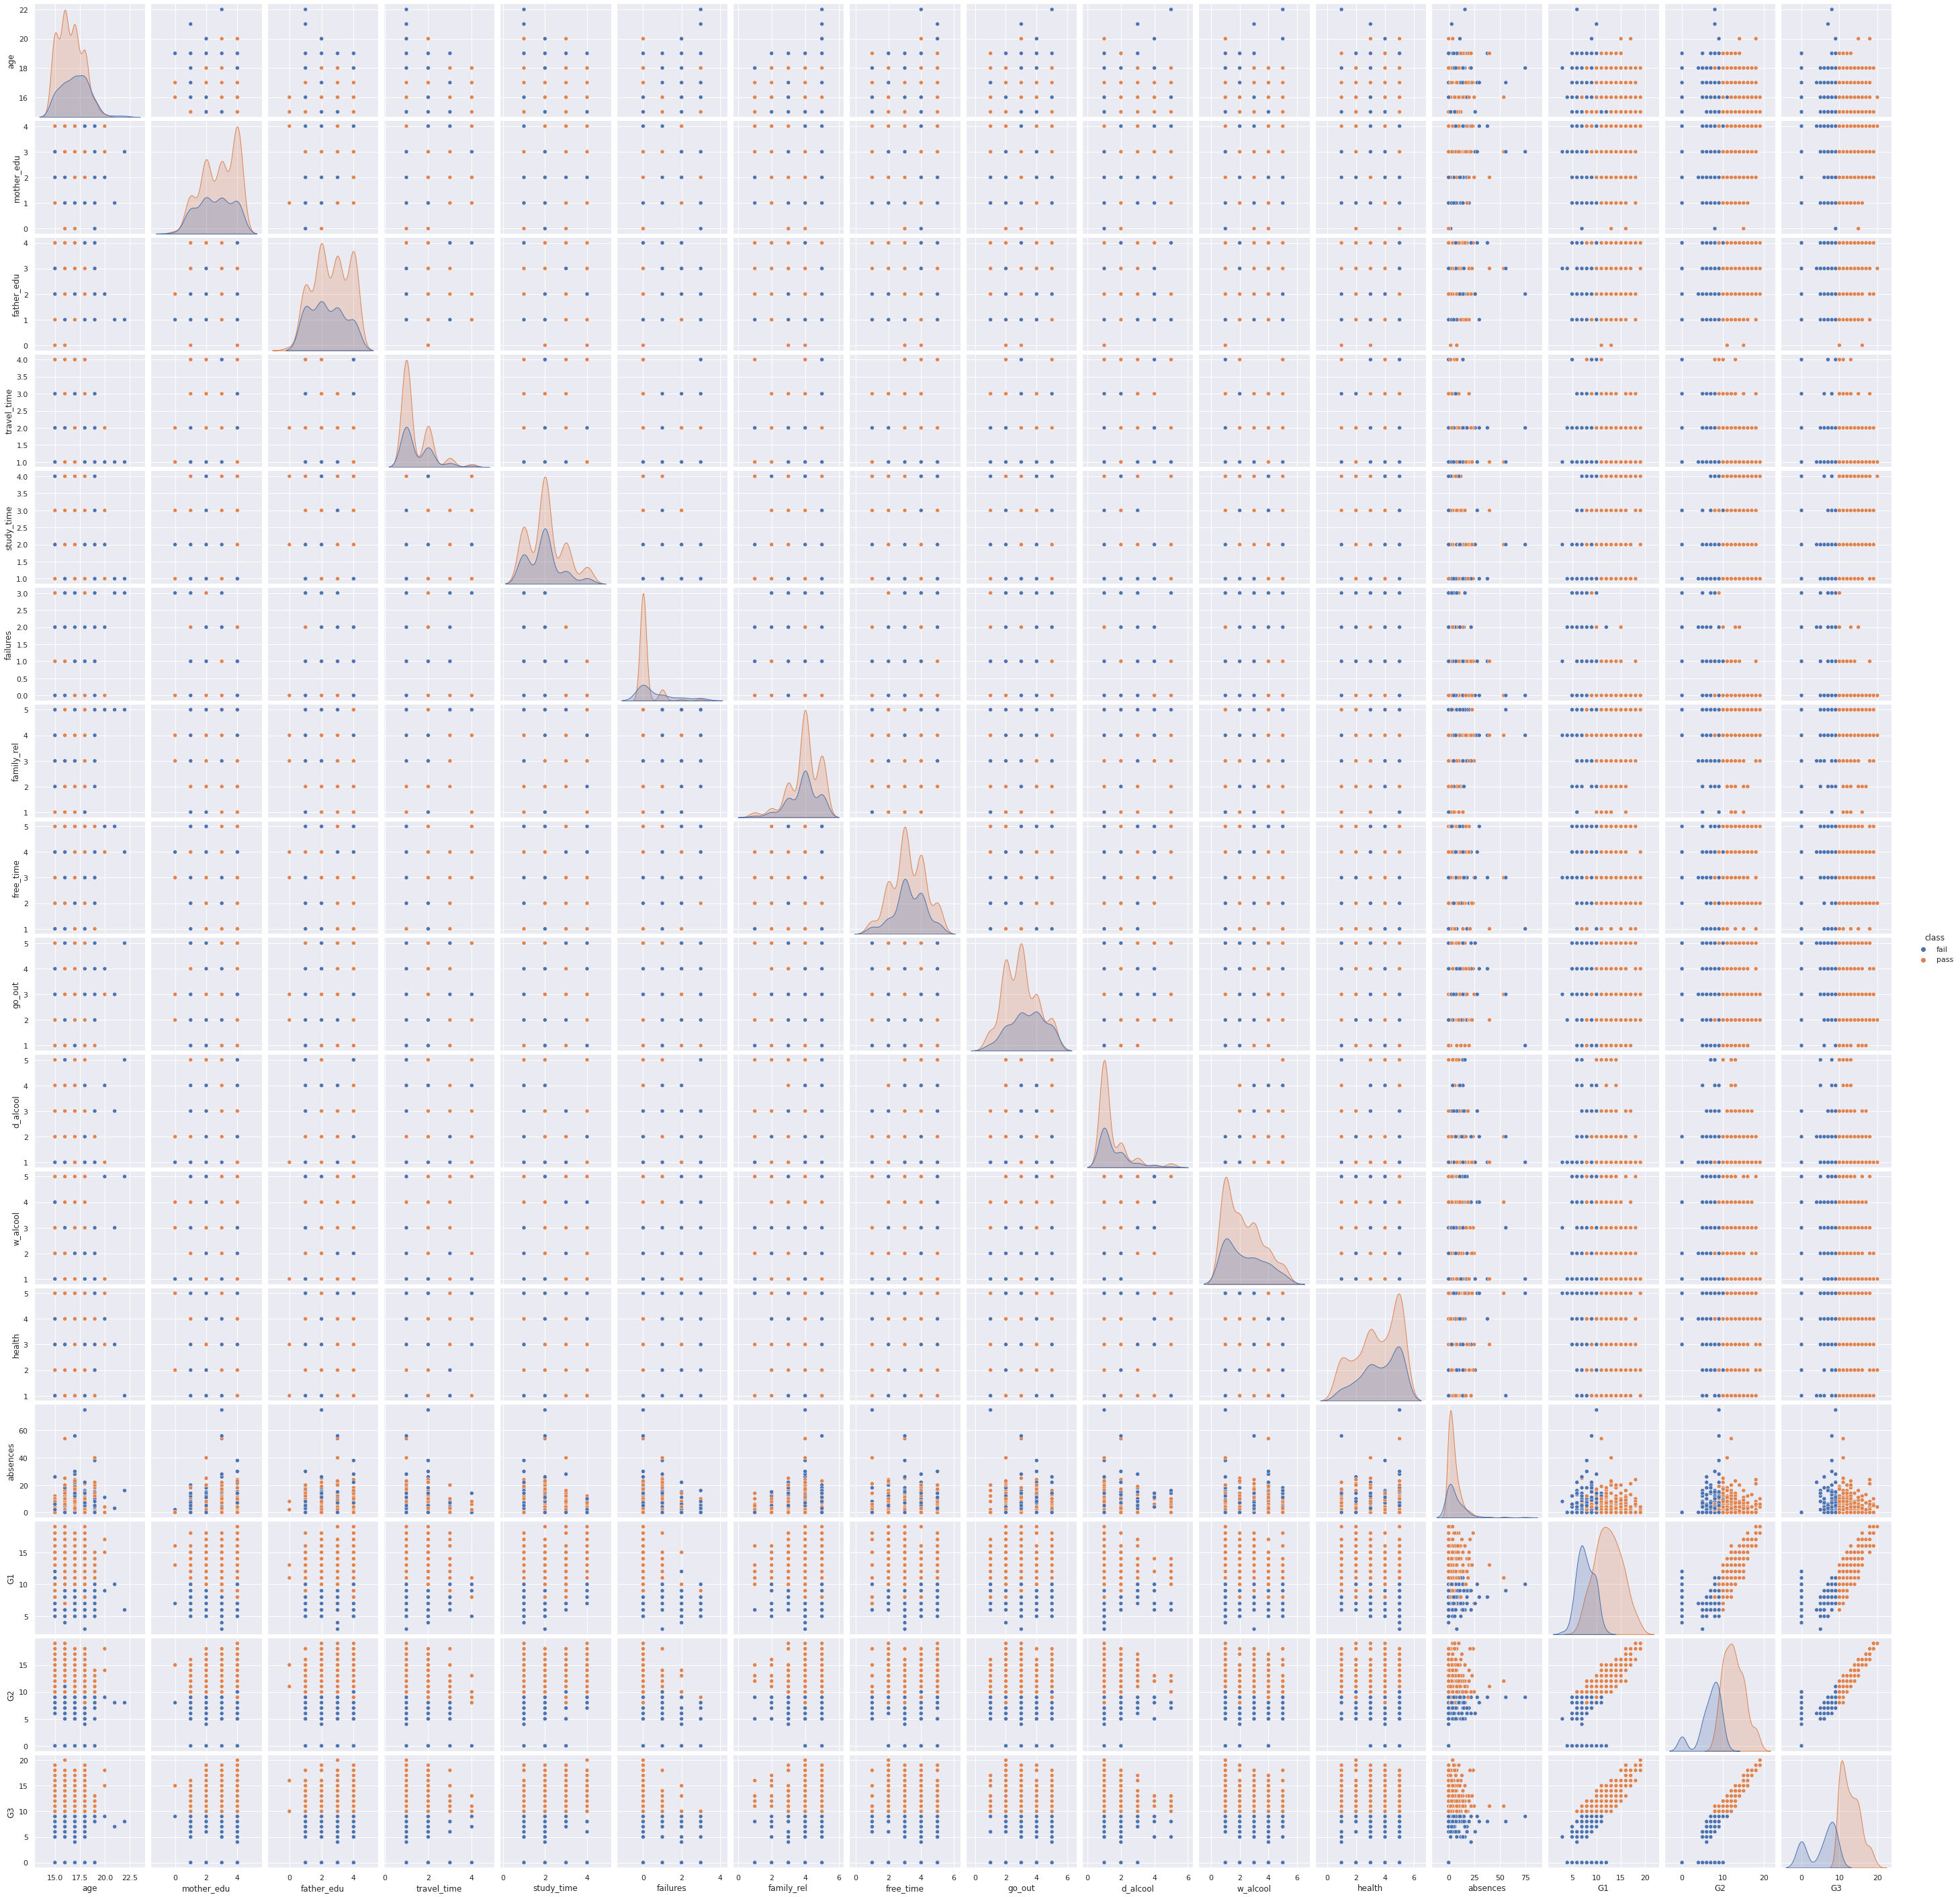

In [18]:
# Scatter Plot com Seaborn
sns.set()
sns.pairplot(data, hue = "class", height = 2.5);

# Pré-Processamento dos Dados
As atividades de **padronização** de **normalização**, que seriam realizadas nesta etapa, serão feitas no momento da construção dos modelos. Com o uso de pipelines, os dados serão padronizados e o modelo será construído para cada fold de teste de validação cruzada. Dessa forma, podemos obter uma estimativa justa de como cada modelo com dados padronizados pode funcionar com dados não vistos.

## 4.1. Selecionando colunas
As colunas G1, G2 e G3 serão deletadas, e apenas a coluna 'class', que indica se o aluno foi aprovado ou reprovado será mantida

In [19]:
new_df = data.drop(['G1', 'G2', 'G3'], axis = 1, errors='ignore')
new_df.head()

,school,sex,age,address,fam_size,parents_status,mother_edu,father_edu,mother_job,father_job,reason,guardian,travel_time,study_time,failures,school_sup,family_sup,paid,activities,nursery,higher,internet,romantic,family_rel,free_time,go_out,d_alcool,w_alcool,health,absences,class
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,fail
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,fail
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,pass
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,pass
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,pass


## 4.2. Valores nulos e inválidos
Conforme visto na análise exploratória, o dataset não tem valores nulos. Também não foram encontrados valores que podem ser considerados inválidos para algum atributo. 

## 4.3. Transformação dos dados categóricos
Muitos algoritmos de aprendizado de máquina não podem operar diretamente com os dados categóricos, portanto, exigem que todas as variáveis de entrada e de saída sejam numéricas. Para isso será realizado o encoding das variáveis categóricas para numéricas.

No caso das variáveis que tem uma ordenação natural, como 'fam_size', será usado a técnica de Ordinal Encoding, na qual cada valor da categoria é atribuído a um valor inteiro, mantendo uma ordenação.

In [20]:
# define ordinal encoding
ordinal_encoder = OrdinalEncoder()

# transform data
new_df[["fam_size"]] = ordinal_encoder.fit_transform(new_df[["fam_size"]])

#print encoded df
print(new_df.head(5))

  school sex  age address  fam_size parents_status  mother_edu  father_edu  \
0     GP   F   18       U       0.0              A           4           4   
1     GP   F   17       U       0.0              T           1           1   
2     GP   F   15       U       1.0              T           1           1   
3     GP   F   15       U       0.0              T           4           2   
4     GP   F   16       U       0.0              T           3           3   

  mother_job father_job  reason guardian  travel_time  study_time  failures  \
0    at_home    teacher  course   mother            2           2         0   
1    at_home      other  course   father            1           2         0   
2    at_home      other   other   mother            1           2         3   
3     health   services    home   mother            1           3         0   
4      other      other    home   father            1           2         0   

  school_sup family_sup paid activities nursery higher i

Para as variáveis categóricas sem ordenação natural, uma codificação one-hot será aplicada. Assim, teremos uma coluna binária para cada categoria. 

In [21]:
# creating instance of one-hot-encoder
one_hot_encoder = OneHotEncoder()

# transform data
new_df[["school","sex","address","parents_status","mother_job","father_job",
        "reason","guardian","school_sup","family_sup","paid","activities","nursery",
        "higher","internet","romantic"]] = ordinal_encoder.fit_transform(new_df[["school","sex",
        "address","parents_status","mother_job","father_job","reason","guardian",
        "school_sup","family_sup","paid","activities","nursery","higher","internet","romantic"]])

#print encoded df
print(new_df.head(5))


   school  sex  age  address  fam_size  parents_status  mother_edu  \
0     0.0  0.0   18      1.0       0.0             0.0           4   
1     0.0  0.0   17      1.0       0.0             1.0           1   
2     0.0  0.0   15      1.0       1.0             1.0           1   
3     0.0  0.0   15      1.0       0.0             1.0           4   
4     0.0  0.0   16      1.0       0.0             1.0           3   

   father_edu  mother_job  father_job  reason  guardian  travel_time  \
0           4         0.0         4.0     0.0       1.0            2   
1           1         0.0         2.0     0.0       0.0            1   
2           1         0.0         2.0     2.0       1.0            1   
3           2         1.0         3.0     1.0       1.0            1   
4           3         2.0         2.0     1.0       0.0            1   

   study_time  failures  school_sup  family_sup  paid  activities  nursery  \
0           2         0         1.0         0.0   0.0         0.0   

## 4.4. Separação em conjunto de treino e conjunto de teste
Primeiro, 10 instâncias serão separada para a etapa final de aplicar o modelo escolhido em dados ainda não vistos.

Em seguida, 70% do dataset será separado como conjunto de treino e 30% para teste, usando a estratégia train-test-split

In [22]:
# 1 - pega 5 linhas aleatorias com a classe 'pass'
pass_idx = new_df[new_df['class']=="pass"].sample(n=5, random_state=7).index
pass_sample = new_df.take(pass_idx, axis=0)

# 2 - pega 5 linhas aleatorias com a classe 'fail'
fail_idx = new_df[new_df['class']=="fail"].sample(n=5, random_state=7).index
fail_sample = new_df.take(fail_idx, axis=0)

# 3 - concatena as amostras de 'fail'  e 'pass'
final_sample = pd.concat([pass_sample, fail_sample], axis=0)

# deleta as linhas do sample do dataset original
idx = np.concatenate((pass_idx.values, fail_idx.values), axis=0)
df = new_df.drop(idx, axis=0, errors='ignore')

final_sample.drop(['class'], axis = 1, errors='ignore', inplace=True)
df['class'].groupby(df['class']).count()

class
fail    125
pass    260
Name: class, dtype: int64

In [23]:
# separando os atributos e a classe do dataset
array = df.values
X = array[:,0:29].astype(float)
Y = array[:,30]

# tamanho do conjunto de teste
test_size = 0.30 

# A semente (seed) que garante que os resultados possam ser reproduzidos de forma idêntica toda vez que o script for rodado. 
seed = 7

# particionando em conjuntos de treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

print(f"Training sample: {Counter(Y_train)}")
print(f"Testing sample: {Counter(Y_test)}")

Training sample: Counter({'pass': 177, 'fail': 92})
Testing sample: Counter({'pass': 83, 'fail': 33})


##4.5. Balanceamento do dataset

Como vimos anteriormente, as classes do dataset estão desbalanceadas. Por isso, será realizado o balanceamento por oversampling, que consiste em adicionar instância da classe em menor quantidade até  igualar ao número de instâncias da classe em maior quantidade.

In [24]:
over_sampler = RandomOverSampler(random_state=seed)
X_res, y_res = over_sampler.fit_resample(X_train, Y_train)

print(f"Training sample: {Counter(y_res)}")

Training sample: Counter({'fail': 177, 'pass': 177})


# Modelos de Classificação

Será usada a validação cruzada 10-fold. Os modelos serão avaliados usando a métrica de acurácia.

Os modelos utilizados serão: Regressão Logística, Árvores de classificação (CART), Máquinas de vetores de suporte (SVM), Naive Bayes (NB) e K-vizinhos mais próximos (KNN).

In [25]:
# Configurando os parâmetros de número de folds e métrica de avaliação
num_folds = 10
scoring = 'accuracy'

In [26]:
# Criação dos modelos
models = []
models.append(('LR', LogisticRegression(solver='liblinear'))) 
models.append(('KNN', KNeighborsClassifier())) 
models.append(('CART', DecisionTreeClassifier())) 
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [27]:
np.random.seed(7) # definindo uma semente global

# Avaliação dos modelos
results = []
names = []
final_message = ''

for name, model in models:
  kfold = KFold(n_splits=num_folds)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  final_message += msg + '\n'

print(final_message)

LR: 0.709687 (0.121392)
KNN: 0.627778 (0.109385)
CART: 0.572222 (0.113689)
NB: 0.690883 (0.110930)
SVM: 0.694872 (0.063200)



De acordo com os valores médios de acurácia observados, a Regressão Logística pode ser um bom modelo, seguida do SVM e do Naive Bayes, com resultados um pouco inferiores.
Para observar a distribuição dos resultados de cada fold da validação cruzada, serão usados boxplots.

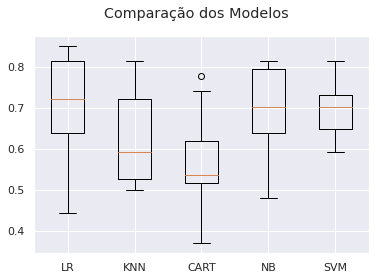

In [28]:
# Comparação dos modelos
fig = plt.figure() 
fig.suptitle('Comparação dos Modelos') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names) 
plt.show()

Observa-se que o a Árvore de Decisão (CART), junto com o KNN possuem as piores medianas. A a Regressão Logística tem a melhor mediana, seguida do SVM. Já o Naive Bayes, aparece com a terceira melhor mediana.

## 5.1. Modelos com dados padronizados
Para mitigar a possibilidade de as distribuições dos dados brutos estarem possam impactar negativamente a habilidade de alguns modelos, os dados serão padronizados. Assim, os dados serão transformados de modo que cada atributo tenha média 0 e um desvio padrão 1. 

In [29]:
np.random.seed(7) # definindo uma semente global

# Padronização do dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression(solver='liblinear'))]))) 
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC(gamma='auto'))])))
results = []
names = []

sandard_final_message = ''

for name, model in pipelines:
  kfold = KFold(n_splits=num_folds)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) 
  sandard_final_message += msg + '\n'

print(sandard_final_message)

ScaledLR: 0.705840 (0.115757)
ScaledKNN: 0.624359 (0.059516)
ScaledCART: 0.572222 (0.113689)
ScaledNB: 0.690883 (0.110930)
ScaledSVM: 0.709544 (0.088012)



Ao comparar os resultados, observa-se que a padronização foi vantajosa para o SVM. Sendo assim, Regressão logística e SVM continuam com os melhores resultados alcançados

In [30]:
# Imprimindo tabela comparativa de modelos
models_table = PrettyTable()
models_table.hrules = 1

models_table.field_names = ('Modelo Simples', 'Modelo com dados padronizados')
models_table.add_rows([[final_message, sandard_final_message]])

print(models_table)

+---------------------------+---------------------------------+
|       Modelo Simples      |  Modelo com dados padronizados  |
+---------------------------+---------------------------------+
|  LR: 0.709687 (0.121392)  |  ScaledLR: 0.705840 (0.115757)  |
|  KNN: 0.627778 (0.109385) |  ScaledKNN: 0.624359 (0.059516) |
| CART: 0.572222 (0.113689) | ScaledCART: 0.572222 (0.113689) |
|  NB: 0.690883 (0.110930)  |  ScaledNB: 0.690883 (0.110930)  |
|  SVM: 0.694872 (0.063200) |  ScaledSVM: 0.709544 (0.088012) |
|                           |                                 |
+---------------------------+---------------------------------+


Analise gráfica dos modelos com dados pasronizados:

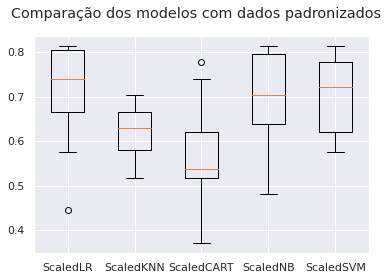

In [31]:
# Comparação dos modelos com dados padronizados
fig = plt.figure()
fig.suptitle('Comparação dos modelos com dados padronizados') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names)
plt.show()

## 5.2. Modelos com dados normalizados


In [32]:
np.random.seed(7) # definindo uma semente global

# Normalização do dataset
pipelines = []
pipelines.append(('ScaledMinMaxLR', Pipeline([('Scaler', MinMaxScaler()),('LR', LogisticRegression(solver='liblinear'))]))) 
pipelines.append(('ScaledMinMaxKNN', Pipeline([('Scaler', MinMaxScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledMinMaxCART', Pipeline([('Scaler', MinMaxScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledMinMaxNB', Pipeline([('Scaler', MinMaxScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledMinMaxSVM', Pipeline([('Scaler', MinMaxScaler()),('SVM', SVC(gamma='auto'))])))
results = []
names = []
normalized_models_message = ''

for name, model in pipelines:
  kfold = KFold(n_splits=num_folds)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  normalized_models_message += msg + '\n'
  
print(normalized_models_message)

ScaledMinMaxLR: 0.705983 (0.089694)
ScaledMinMaxKNN: 0.650142 (0.094420)
ScaledMinMaxCART: 0.572222 (0.113689)
ScaledMinMaxNB: 0.690883 (0.110930)
ScaledMinMaxSVM: 0.657977 (0.039837)



Observa-se que a normalização dos dados, diminuiu consideravelmente o resultado do SVM.

In [33]:
# Imprimindo tabela comparativa de modelos

# Não executar o comando de add_column múltiplas vezes, pois a cada execução 
#será adicionada uma nova coluna de dados normalizados

models_table.add_column('Modelos com dados normalizados', [normalized_models_message])
print(models_table)

+---------------------------+---------------------------------+---------------------------------------+
|       Modelo Simples      |  Modelo com dados padronizados  |     Modelos com dados normalizados    |
+---------------------------+---------------------------------+---------------------------------------+
|  LR: 0.709687 (0.121392)  |  ScaledLR: 0.705840 (0.115757)  |  ScaledMinMaxLR: 0.705983 (0.089694)  |
|  KNN: 0.627778 (0.109385) |  ScaledKNN: 0.624359 (0.059516) |  ScaledMinMaxKNN: 0.650142 (0.094420) |
| CART: 0.572222 (0.113689) | ScaledCART: 0.572222 (0.113689) | ScaledMinMaxCART: 0.572222 (0.113689) |
|  NB: 0.690883 (0.110930)  |  ScaledNB: 0.690883 (0.110930)  |  ScaledMinMaxNB: 0.690883 (0.110930)  |
|  SVM: 0.694872 (0.063200) |  ScaledSVM: 0.709544 (0.088012) |  ScaledMinMaxSVM: 0.657977 (0.039837) |
|                           |                                 |                                       |
+---------------------------+---------------------------------+-

## 5.3. Ajuste dos Modelos
Será feita uma tentativa de explorar outras configurações dos modelos SVM e KNN, através da variação hiperparâmetros, para verificar se essas configurações podem gerar resultados ainda melhores que os observados anteriormente.

### Ajuste do KNN

Vamos usar o conjunto de dados normalizados, por ter apresentado os melhores resultados para o KNN nas avaliações anteriores.

Serão ajustados os parâmetros número de vizinhos, as métricas de distância para o KNN e o algorítmo usado para calcular os vizinhos mais próximos. 

* Para os n vizinhos, serão testados todos os valores de k entre 1 a 50; 
* Para as métricas de distância, serão testadas a métrica euclidiana, manhattan e minkowski;
* Para o algoritmo, serão testados auto, ball_tree, kd_tree, brute



In [34]:
np.random.seed(7) # semente global
kfold = KFold(n_splits=num_folds)

# Lista de hyperparâmetros a serem tunados

n_neighbors = list(range(1,50))
metric = ["euclidean", "manhattan", "minkowski"] # todos os valores válidos
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute'] # todos os valores válidos

param_grid = {
    'knn__n_neighbors': n_neighbors,
    'knn__metric': metric,
    'knn__algorithm': algorithm
}
pipeline = Pipeline(steps=[('Scaler', MinMaxScaler()), ('knn', KNeighborsClassifier())])
grid2 = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring=scoring, cv=kfold)

grid2.fit(X_train, Y_train)

print("Melhor: %f usando %s" % (grid2.best_score_, grid2.best_params_))

Melhor: 0.695157 usando {'knn__algorithm': 'auto', 'knn__metric': 'euclidean', 'knn__n_neighbors': 26}


Observa-se que houve uma melhora expressiva no resultado do KNN, mas ainda com resultado inferior aos melhores resultados encontrados nas etapas enteriores com outros algoritmos.

### Ajuste do SVM
Para o SVM, vamos usar o conjunto de dados padronizados, por ter apresentado os melhores resultados nas avaliações anteriores.

Serão ajustados os parâmetros C, kernel e gamma.

In [35]:
np.random.seed(7) # semente global
kfold = KFold(n_splits=num_folds)

# Tuning do SVM
pipeline = Pipeline(steps=[('Scaler', StandardScaler()), ('svc', SVC(gamma='auto'))])

print(SVC().get_params().keys())
param_grid_svc = {
    'svc__C': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0],
    'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'svc__gamma': [1, 0.1, 0.01, 0.001, 0.0001]
}

grid = GridSearchCV(estimator=pipeline, param_grid=param_grid_svc, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)

print("Melhor: %f usando %s" % (grid_result.best_score_, grid_result.best_params_)) 

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])
Melhor: 0.705840 usando {'svc__C': 0.1, 'svc__gamma': 1, 'svc__kernel': 'linear'}


Nota-se que, mesmo com a variação de parâmetros, não é possível ultrapassar a taxa de acertos de 0.71

 ## Métodos Ensemble
 Avaliaremos quatro modelos diferentes, com a validação cruzada 10-fold:

* Métodos de Boosting: AdaBoost (AB) e Gradient Boosting (GBM).
* Métodos de Bagging: Random Forests (RF) e Extra Trees (ET).


In [36]:
np.random.seed(7) # definindo uma semente global

# Ensembles

ensembles = []

ensembles.append(('AB', AdaBoostClassifier())) 
ensembles.append(('GBM', GradientBoostingClassifier())) 
ensembles.append(('RF', RandomForestClassifier(n_estimators=10))) 
ensembles.append(('ET', ExtraTreesClassifier(n_estimators=10))) 
results = []
names = []
for name, model in ensembles:
  kfold = KFold(n_splits=num_folds)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

AB: 0.668519 (0.101582)
GBM: 0.687464 (0.057095)
RF: 0.631909 (0.082077)
ET: 0.627635 (0.101138)


Os métodos ensemble não foram capazes de superar os resultados da regressão logística, com melhores resultados.

## Finalização do Modelo

Até aqui, verificamos que a regressão logística foi o modelo que mostrou melhor acurácia para o problema. 
O modelo será finalizado, treinando-o em todo o conjunto de dados de treinamento (sem validação cruzada) e faremos predições para o conjunto de dados de teste que foi separado logo no início do exemplo, a fim de confirmarmos nossas descobertas.


In [37]:
model = LogisticRegression(solver='liblinear')
model.fit(X_train, Y_train)

# Estimativa da acurácia no conjunto de teste
predictions = model.predict(X_test)

print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

0.6637931034482759
[[ 7 26]
 [13 70]]
              precision    recall  f1-score   support

        fail       0.35      0.21      0.26        33
        pass       0.73      0.84      0.78        83

    accuracy                           0.66       116
   macro avg       0.54      0.53      0.52       116
weighted avg       0.62      0.66      0.63       116



Por meio do conjunto de testes, verificamos que alcançamos uma acurácia de 66% em dados não vistos. Um resultado consideravelmente inferior as expectativas, pois durante os experientos obtivemos uma acurácia estimada de 71%. Valores semelhantes são esperados quando este modelo estiver executando em produção e fazendo predições para novos dados.

Treinando o modelo com todo o dataset:

In [38]:
# Preparação do modelo com TODO o dataset (e não apenas a base de treino)
model = LogisticRegression(solver='liblinear')
model.fit(X, Y)

LogisticRegression(solver='liblinear')

## Aplicando o modelo em dados não vistos

No início do trabalho foram separadas 10 instâncias ainda não conhecidas pelo modelo, sem a classe de saída. 
Testando o modelo com essas novas instâncias:

In [39]:
entrada = final_sample.values
X_entrada = entrada[:,0:29].astype(float)

# Estimativa de classes dos dados de entrada
saidas = model.predict(X_entrada)
print(saidas)

['pass' 'pass' 'pass' 'pass' 'pass' 'pass' 'fail' 'fail' 'pass' 'pass']
